In [ ]:
"""
Mounting the Google drive
"""
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
root_path = "/content/drive/Shareddrives/CSEN240_Group11"
train_path = root_path + "/trainingset0206"
grade_path = root_path + "/grade"

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def is_image_file(filename):
    extensions = ['.png', '.jpg', '.jpeg', '.PNG', '.JPG', '.JPEG']
    return any(filename.endswith(extension) for extension in extensions)

# mapping from filename to label and set of all labels
mapping, labels = {}, set()
with open(train_path + '/file_mapping.txt') as file_mapping:
    for line in file_mapping:
        filename, label = line.split()
        if is_image_file(filename):
            labels.add(label)
            mapping[filename] = label

# image dataset sorted by labels
image_files = [f for f in os.listdir(train_path) if is_image_file(f)]
image_files.sort(key=lambda filename : mapping[filename])

In [ ]:
# just testing stuff

inp = input('Enter Input: ')
print(inp)

Enter Input: Hello
Hello


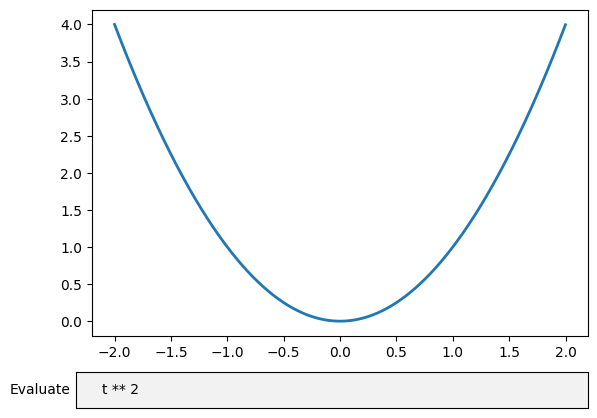

In [ ]:
# just testing stuff

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import TextBox
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.2)
t = np.arange(-2.0, 2.0, 0.001)
ydata = t ** 2
initial_text = "t ** 2"
l, = plt.plot(t, ydata, lw=2)


def submit(text):
    ydata = eval(text)
    l.set_ydata(ydata)
    ax.set_ylim(np.min(ydata), np.max(ydata))
    plt.draw()

axbox = plt.axes([0.1, 0.05, 0.8, 0.075])
text_box = TextBox(axbox, 'Evaluate', initial=initial_text)
text_box.on_submit(submit)

plt.show()

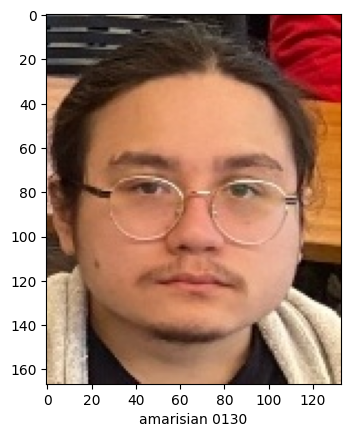

KeyboardInterrupt: Interrupted by user

In [ ]:
noisy_images = []

# shows all images with labels
for filename in image_files:
    img = mpimg.imread(train_path + '/' + filename)
    imgplot = plt.imshow(img)
    date = filename.split('_')[0]
    plt.xlabel(mapping[filename] + ' ' + date)
    plt.show()

    noisy = input('Is this data noisy? [1] yes | [2] no')
    if noisy:
      noisy_images.append(filename)

In [ ]:
import pandas as pd
# Assuming the CSV file has columns 'sample_id' and 'ground_truth'


def calculate_accuracy(ground_truths, predictions):
    if len(ground_truths) != len(predictions):
        msg = "The number of predictions does not match the number of ground truths."
        raise ValueError(msg)
    correct_predictions = 0
    for sample_id, ground_truth in ground_truths.items():
        if predictions.get(sample_id) == ground_truth:
            correct_predictions += 1
    return correct_predictions / len(ground_truths)

def grade_predictions(predictions, grade_path=grade_path):
    df = pd.read_csv(grade_path + "/solution.csv")
    ground_truths = dict(zip(df['filename'], df['ground_truth']))
    accuracy = calculate_accuracy(ground_truths, predictions)
    return accuracy

# Example usage
predictions = {'id1': 'A', 'id2': 'B', 'id3': 'C'}  # Your predictions
accuracy = grade_predictions(predictions)
print(f"Prediction Accuracy: {accuracy * 100}%")

Prediction Accuracy: 100.0%
